### Retail Dataset

This dataset contains lot of historical sales data. It was extracted from a Brazilian top retailer and has many SKUs and many stores. The data was transformed to protect the identity of the retailer.

In [328]:
import pandas as pd
import numpy as np 
import seaborn as sns
import calendar
import datetime  
from datetime import datetime as dt
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [329]:
retail = pd.read_csv('mock_kaggle.csv')

In [330]:
retail['date'] = pd.to_datetime(retail['date'])

In [331]:
retail.head()

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [332]:
retail.tail()

,date,sale,stock,price
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39
936,2016-07-31,183,3642,2.39


In [333]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    937 non-null    datetime64[ns]
 1   sale    937 non-null    int64         
 2   stock   937 non-null    int64         
 3   price   937 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 29.4 KB


In [334]:
retail.describe()

,sale,stock,price
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [335]:
retail.isnull().sum()

date     0
sale     0
stock    0
price    0
dtype: int64

In [337]:
retail['dow'] = retail['date'].dt.dayofweek
retail['day_of_week'] = retail['date'].dt.day_name()
#retail['weeknum'] = retail['date'].dt.week
retail['weeknum'] = retail['date'].dt.strftime('%W')

In [340]:
retail.head(20)

,date,sale,stock,price,dow,day_of_week,weeknum
0,2014-01-01,0,4972,1.29,2,Wednesday,00
1,2014-01-02,70,4902,1.29,3,Thursday,00
2,2014-01-03,59,4843,1.29,4,Friday,00
3,2014-01-04,93,4750,1.29,5,Saturday,00
4,2014-01-05,96,4654,1.29,6,Sunday,00
5,2014-01-06,145,4509,1.29,0,Monday,01
6,2014-01-07,179,4329,1.29,1,Tuesday,01
7,2014-01-08,321,4104,1.29,2,Wednesday,01
8,2014-01-09,125,4459,1.09,3,Thursday,01
9,2014-01-10,88,5043,1.09,4,Friday,01


### Day of Week Analysis

In [341]:
retail_dow = retail.groupby(['day_of_week','dow']).mean()

In [342]:
retail['sale']

0        0
1       70
2       59
3       93
4       96
      ... 
932     98
933    108
934    128
935    270
936    183
Name: sale, Length: 937, dtype: int64

In [343]:
retail_dow

,,sale,stock,price
day_of_week,dow,,,
Friday,4,89.373134,1690.268657,1.600373
Monday,0,69.212121,1535.143939,1.620985
Saturday,5,141.514925,1612.320896,1.581716
Sunday,6,96.866667,1535.970370,1.586074
Thursday,3,76.911111,1688.607407,1.577926
Tuesday,1,67.393939,1521.424242,1.601061
Wednesday,2,91.844444,1671.155556,1.580667


In [344]:
retail_dow.sort_values("dow", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

In [345]:
retail_dow

,,sale,stock,price
day_of_week,dow,,,
Monday,0,69.212121,1535.143939,1.620985
Tuesday,1,67.393939,1521.424242,1.601061
Wednesday,2,91.844444,1671.155556,1.580667
Thursday,3,76.911111,1688.607407,1.577926
Friday,4,89.373134,1690.268657,1.600373
Saturday,5,141.514925,1612.320896,1.581716
Sunday,6,96.866667,1535.970370,1.586074


In [347]:
df = retail_dow.drop(['stock'], axis=1)

In [348]:
df

,,sale,price
day_of_week,dow,,
Monday,0,69.212121,1.620985
Tuesday,1,67.393939,1.601061
Wednesday,2,91.844444,1.580667
Thursday,3,76.911111,1.577926
Friday,4,89.373134,1.600373
Saturday,5,141.514925,1.581716
Sunday,6,96.866667,1.586074


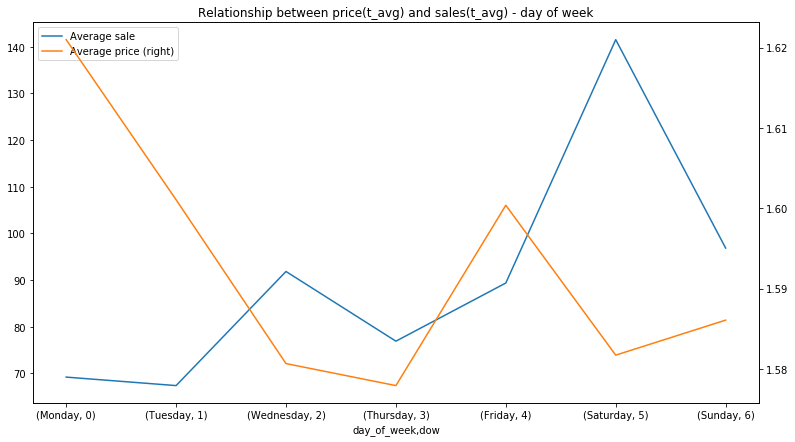

In [349]:
df["sale"].plot(label="Average sale",  title = "Relationship between price(t_avg) and sales(t_avg) - day of week", legend=True, figsize=(13,7))
df["price"].plot(label="Average price", legend=True, secondary_y=True)
## df.plot(figsize=(12,8),secondary_y=True)
plt.show()

#### According to above dual weekly graph, we could find there is an inverse relationship between sales and price

add comment

In [350]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum
0,2014-01-01,0,4972,1.29,2,Wednesday,00
1,2014-01-02,70,4902,1.29,3,Thursday,00
2,2014-01-03,59,4843,1.29,4,Friday,00
3,2014-01-04,93,4750,1.29,5,Saturday,00
4,2014-01-05,96,4654,1.29,6,Sunday,00
...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30
933,2016-07-28,108,3071,2.39,3,Thursday,30
934,2016-07-29,128,4095,2.39,4,Friday,30
935,2016-07-30,270,3825,2.39,5,Saturday,30


In [351]:
retail['year'] = retail['date'].dt.year

In [352]:
retail.head()

,date,sale,stock,price,dow,day_of_week,weeknum,year
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014
2,2014-01-03,59,4843,1.29,4,Friday,00,2014
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014


In [353]:
retail_dow2 = retail.groupby(['year','weeknum']).mean()

In [354]:
retail_dow2

sale        stock     price       dow
year weeknum                                             
2014 00        63.600000  4824.200000  1.290000  4.000000
     01       166.714286  4685.857143  1.175714  3.000000
     02       124.666667  4694.500000  1.140000  2.833333
     03       119.714286  3842.714286  1.118571  3.000000
     04       214.285714  2688.857143  1.018571  3.000000
...                  ...          ...       ...       ...
2016 26       176.714286  1782.857143  2.390000  3.000000
     27       141.428571  1808.142857  2.390000  3.000000
     28       204.428571  1469.428571  1.961429  3.000000
     29       146.000000  1250.857143  2.175714  3.000000
     30       135.142857  3151.857143  2.390000  3.000000

[137 rows x 4 columns]

In [355]:
df2 = retail_dow2.drop(['stock','dow'], axis=1)

In [356]:
df2

sale     price
year weeknum                      
2014 00        63.600000  1.290000
     01       166.714286  1.175714
     02       124.666667  1.140000
     03       119.714286  1.118571
     04       214.285714  1.018571
...                  ...       ...
2016 26       176.714286  2.390000
     27       141.428571  2.390000
     28       204.428571  1.961429
     29       146.000000  2.175714
     30       135.142857  2.390000

[137 rows x 2 columns]

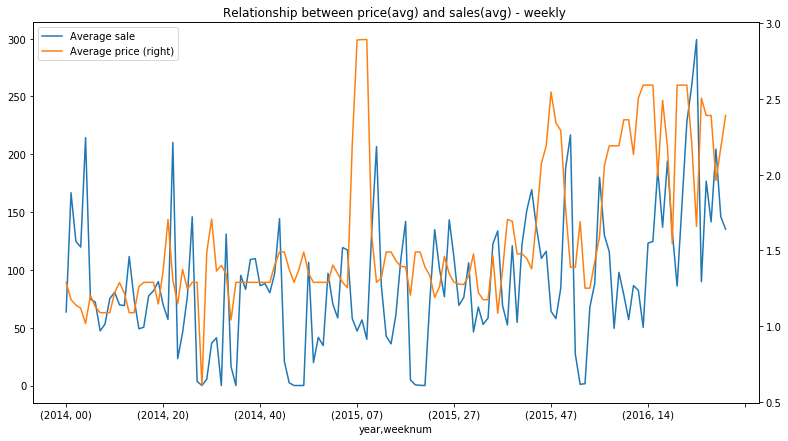

In [357]:
df2["sale"].plot(label="Average sale",  title = "Relationship between price(avg) and sales(avg) - weekly ", legend=True, figsize=(13,7))
df2["price"].plot(label="Average price", legend=True, secondary_y=True)
## df.plot(figsize=(12,8),secondary_y=True)
plt.show()

### Moving Average

In [358]:
retail['7-day'] = retail['price'].rolling(7).mean()
retail['14-day'] = retail['price'].rolling(14).mean()
retail['21-day'] = retail['price'].rolling(21).mean()

In [359]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30,2016,2.39,2.140000,2.175714
933,2016-07-28,108,3071,2.39,3,Thursday,30,2016,2.39,2.175714,2.175714
934,2016-07-29,128,4095,2.39,4,Friday,30,2016,2.39,2.211429,2.175714
935,2016-07-30,270,3825,2.39,5,Saturday,30,2016,2.39,2.247143,2.175714


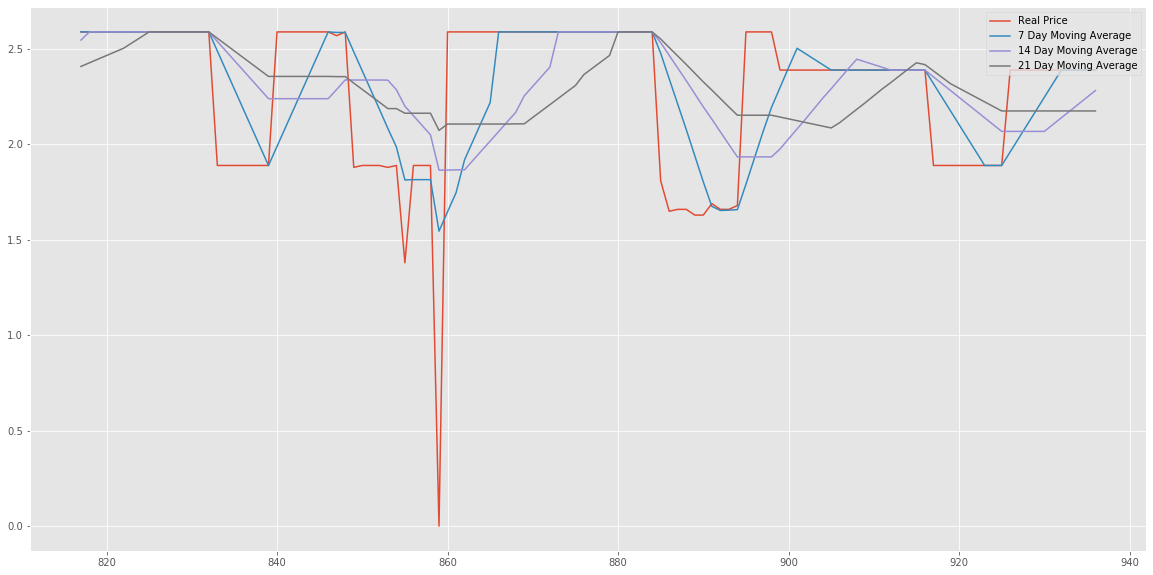

In [360]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (20,10))
    plt.plot(retail.price[-120:], label = 'Real Price')
    plt.plot(retail['7-day'][-120:], label = '7 Day Moving Average')
    plt.plot(retail['14-day'][-120:], label = '14 Day Moving Average')
    plt.plot(retail['21-day'][-120:], label = '21 Day Moving Average')
    plt.legend(loc =1)

In [361]:
retail['7-day'] = retail['sale'].rolling(7).mean()
retail['14-day'] = retail['sale'].rolling(14).mean()
retail['21-day'] = retail['sale'].rolling(21).mean()

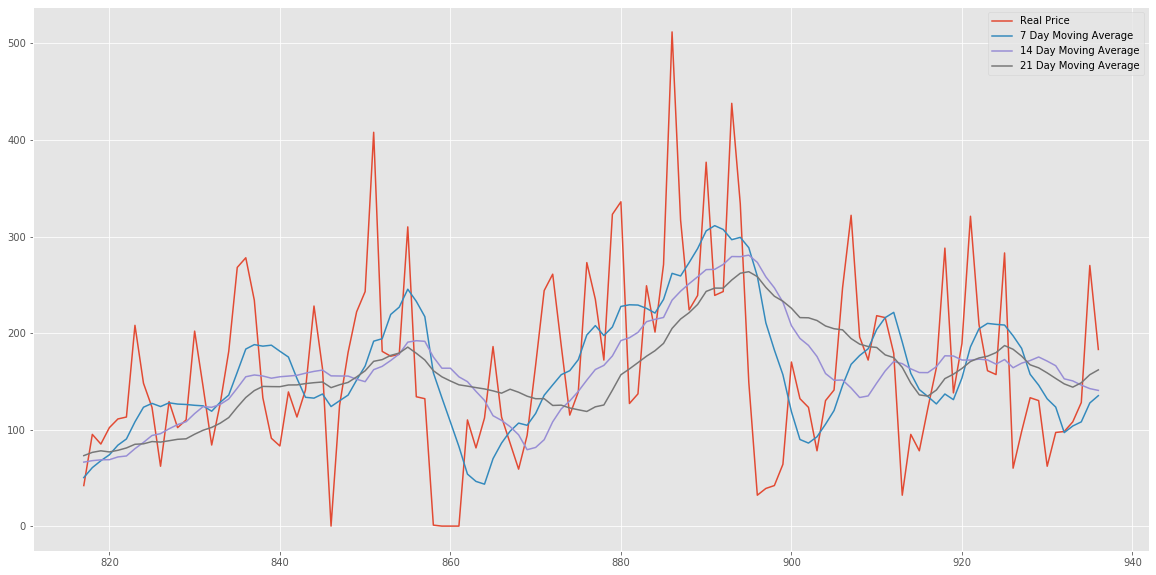

In [362]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (20,10))
    plt.plot(retail.sale[-120:], label = 'Real Price')
    plt.plot(retail['7-day'][-120:], label = '7 Day Moving Average')
    plt.plot(retail['14-day'][-120:], label = '14 Day Moving Average')
    plt.plot(retail['21-day'][-120:], label = '21 Day Moving Average')
    plt.legend(loc =1)

In [363]:
retail.head(20)

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN
5,2014-01-06,145,4509,1.29,0,Monday,01,2014,NaN,NaN,NaN
6,2014-01-07,179,4329,1.29,1,Tuesday,01,2014,91.714286,NaN,NaN
7,2014-01-08,321,4104,1.29,2,Wednesday,01,2014,137.571429,NaN,NaN
8,2014-01-09,125,4459,1.09,3,Thursday,01,2014,145.428571,NaN,NaN
9,2014-01-10,88,5043,1.09,4,Friday,01,2014,149.571429,NaN,NaN


#### Check for stationarity using the Dicky Fuller Test for all three datasets


In [364]:
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(retail['price'])
print(result1)

(-4.5854371741841495, 0.00013739285676424819, 2, 934, {'1%': -3.4373707314972766, '5%': -2.8646394422797337, '10%': -2.5684203292233905}, -90.17618431524147)


#### Simple Exponential Smoothing 

In [365]:
def simple_exp_smooth(d,extra_periods,alpha):  


  d = np.array(d)  # Transform the input into a numpy array  

  cols = len(d)  # Historical period length  

  d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  



  f = np.full(cols+extra_periods,np.nan)  # Forecast array  

  f[0] = d[0]  # initialization of first forecast  

    

  # Create all the t+1 forecasts until end of historical period  

  for t in range(1,cols+1):  

    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
    f[cols+1:] = f[t]  # Forecast for all extra periods  


  df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Error":f-d}) 
  return df

#### Double Exponential Smoothing

In [366]:
# Double Exponential Smoothing
def double_exp_smooth(d,extra_periods,alpha,beta):  

    d = np.array(d)  # Transform the input into a numpy array  
    cols = len(d)  # Historical period length  
    d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
# Creation of the level, trend, and forecast arrays
    f= np.full(cols+extra_periods,np.nan)  # Forecast array  
    a = np.full(cols+extra_periods,np.nan)
    b = np.full(cols+extra_periods,np.nan)
# Level and trend initialization 
    a[0] = d[0]
    b[0] = d[1] -d[0]

    
  # Create all the t+1 forecasts until end of historical period  

    for t in range(1,cols):  
        f[t] = a[t-1]+ b[t-1]
        a[t] = alpha*d[t] + (1-alpha)*(a[t-1] + b[t-1])
        b[t] = beta*(a[t] - a[t-1]) + (1-beta)* b[t-1]

# Forecast for all extra periods  
    for t in range(cols, cols+extra_periods):
        f[t] = a[t-1] + b[t-1]
        a[t] = f[t]
        b[t] = b[t-1]


    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Level": a, "Trend": b, "Error":f-d}) 
    return df

In [367]:
df1=simple_exp_smooth(retail['sale'],7,1)
df1.head(10)

,Demand,Forecast,Error
0,0.0,0.0,0.0
1,70.0,0.0,-70.0
2,59.0,70.0,11.0
3,93.0,59.0,-34.0
4,96.0,93.0,-3.0
5,145.0,96.0,-49.0
6,179.0,145.0,-34.0
7,321.0,179.0,-142.0
8,125.0,321.0,196.0
9,88.0,125.0,37.0


In [368]:
# For KPI Calculation
MAE = df1["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df1["Error"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE: 45.01
RMSE: 67.76


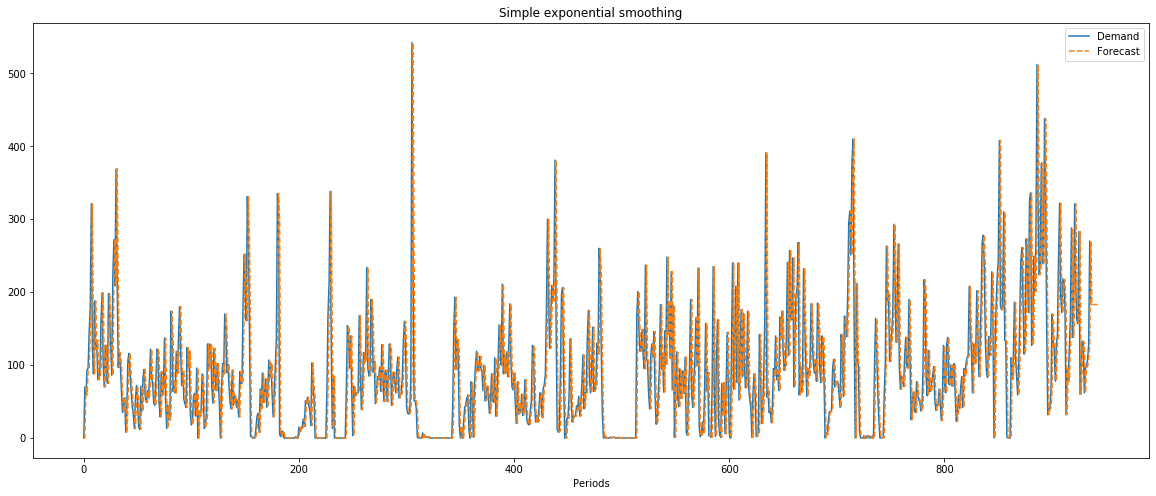

In [369]:
#For Plotting
df1.index.name = "Periods"
df1[["Demand","Forecast"]].plot(figsize=(20,8),title="Simple exponential smoothing",style=["-","--"])  
plt.show()


In [370]:
df11=double_exp_smooth(retail['sale'],7,1,0.05)
df11.tail(10)

,Demand,Forecast,Level,Trend,Error
934,128.0,105.467245,128.000000,-1.406117,-22.532755
935,270.0,126.593883,270.000000,5.764189,-143.406117
936,183.0,275.764189,183.000000,1.125980,92.764189
937,NaN,184.125980,184.125980,1.125980,NaN
938,NaN,185.251959,185.251959,1.125980,NaN
939,NaN,186.377939,186.377939,1.125980,NaN
940,NaN,187.503918,187.503918,1.125980,NaN
941,NaN,188.629898,188.629898,1.125980,NaN
942,NaN,189.755877,189.755877,1.125980,NaN
943,NaN,190.881857,190.881857,1.125980,NaN


In [371]:
MAE = df11["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df11["Error"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE: 46.76
RMSE: 69.77


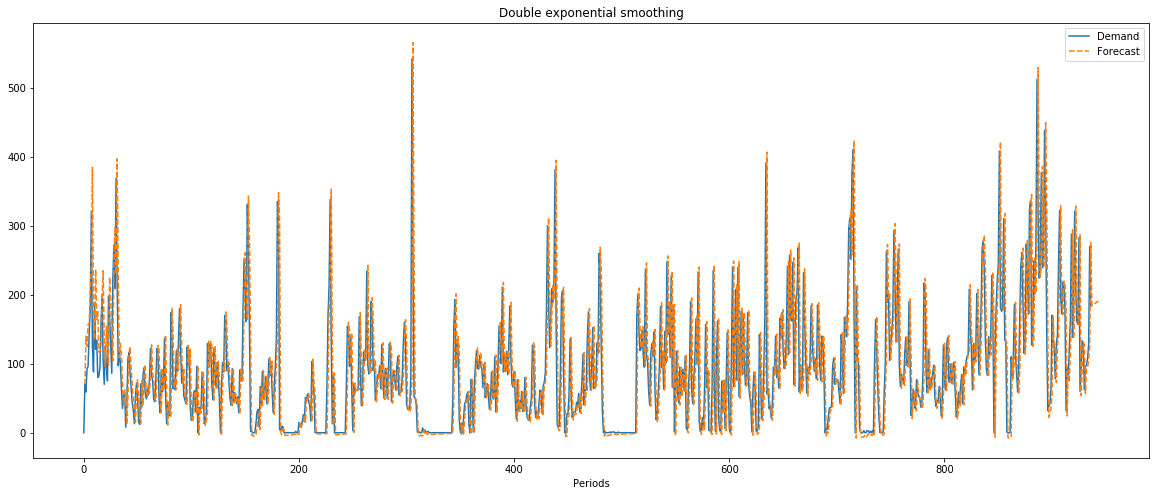

In [372]:
#For Plotting
df11.index.name = "Periods"
df11[["Demand","Forecast"]].plot(figsize=(20,8),title="Double exponential smoothing",style=["-","--"])  
plt.show()

## Machine Learning

In [460]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day,year_week
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN,2014-00
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN,2014-00
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN,2014-00
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN,2014-00
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN,2014-00
...,...,...,...,...,...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30,2016,96.857143,152.571429,147.333333,2016-30
933,2016-07-28,108,3071,2.39,3,Thursday,30,2016,103.714286,150.428571,143.952381,2016-30
934,2016-07-29,128,4095,2.39,4,Friday,30,2016,108.000000,146.071429,148.523810,2016-30
935,2016-07-30,270,3825,2.39,5,Saturday,30,2016,127.571429,142.428571,156.857143,2016-30


Predict based on weekly average

In [461]:
retail["year_week"] = retail["year"].map(str) + '-' + retail["weeknum"].map(str)

In [462]:
retail

,date,sale,stock,price,dow,day_of_week,weeknum,year,7-day,14-day,21-day,year_week
0,2014-01-01,0,4972,1.29,2,Wednesday,00,2014,NaN,NaN,NaN,2014-00
1,2014-01-02,70,4902,1.29,3,Thursday,00,2014,NaN,NaN,NaN,2014-00
2,2014-01-03,59,4843,1.29,4,Friday,00,2014,NaN,NaN,NaN,2014-00
3,2014-01-04,93,4750,1.29,5,Saturday,00,2014,NaN,NaN,NaN,2014-00
4,2014-01-05,96,4654,1.29,6,Sunday,00,2014,NaN,NaN,NaN,2014-00
...,...,...,...,...,...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,2,Wednesday,30,2016,96.857143,152.571429,147.333333,2016-30
933,2016-07-28,108,3071,2.39,3,Thursday,30,2016,103.714286,150.428571,143.952381,2016-30
934,2016-07-29,128,4095,2.39,4,Friday,30,2016,108.000000,146.071429,148.523810,2016-30
935,2016-07-30,270,3825,2.39,5,Saturday,30,2016,127.571429,142.428571,156.857143,2016-30


In [463]:
retail_ml = retail.groupby(["year_week"]).mean()

In [464]:
retail_ml

,sale,stock,price,dow,year,7-day,14-day,21-day
year_week,,,,,,,,
2014-00,63.600000,4824.200000,1.290000,4.000000,2014.0,NaN,NaN,NaN
2014-01,166.714286,4685.857143,1.175714,3.000000,2014.0,142.357143,NaN,NaN
2014-02,124.666667,4694.500000,1.140000,2.833333,2014.0,132.023810,131.442857,NaN
2014-03,119.714286,3842.714286,1.118571,3.000000,2014.0,119.612245,128.295918,127.828571
2014-04,214.285714,2688.857143,1.018571,3.000000,2014.0,164.918367,142.265306,140.503401
...,...,...,...,...,...,...,...,...
2016-26,176.714286,1782.857143,2.390000,3.000000,2016.0,127.714286,157.102041,203.823129
2016-27,141.428571,1808.142857,2.390000,3.000000,2016.0,187.897959,157.806122,167.367347
2016-28,204.428571,1469.428571,1.961429,3.000000,2016.0,153.183673,170.540816,156.265306


In [465]:
retail_ml = retail_ml.drop(['stock','year','7-day','14-day','21-day','dow','price'], axis=1)

In [466]:
retail_ml.sort_values("year_week", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 


In [467]:
retail_ml

,sale
year_week,
2014-00,63.600000
2014-01,166.714286
2014-02,124.666667
2014-03,119.714286
2014-04,214.285714
...,...
2016-26,176.714286
2016-27,141.428571
2016-28,204.428571


In [468]:
df_ml = pd.DataFrame(retail_ml)

In [469]:
df_ml

,sale
year_week,
2014-00,63.600000
2014-01,166.714286
2014-02,124.666667
2014-03,119.714286
2014-04,214.285714
...,...
2016-26,176.714286
2016-27,141.428571
2016-28,204.428571


In [470]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months in this case
for i in range(12,0,-1):
    df_ml[['t-'+str(i)]] = retail_ml.shift(i)
print(df_ml)

ValueError: Columns must be same length as key